In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import glob
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
strrev = lambda y: str(''.join([_ for _ in reversed(y)]))
def get_label(dct):
    if float(dct['α']) == 0:
        return '1_OLS'
    elif float(dct['l1r']) == 1:
        return f'2_L1, α={dct["α"]}'
    elif float(dct['l1r']) == 0:
        return f'3_L2, α={dct["α"]}'
    else:
        return f'4_l1r={dct["l1r"]}, α={dct["α"]}'
    return

In [5]:
# file_loc = r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs\final_outputs_rev\Figure_3-mse_sctr.csv'

# file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps/Figure_1_2-mse_sctr.csv'
# file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps-wds/Figure_1_2-mse_sctr.csv'

# file_loc_lst = [
#     r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps/Figure_1_2-mse_sctr.csv',
#     r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps-wds/Figure_1_2-mse_sctr.csv'
# ]
file_loc_lst = [
    r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs-old/run_20230404--20_20sft/Figure_7_g1--20_20sft-mse_sctr.csv',
#     r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs-old/final_outputs-old-wds/Figure_1_2-mse_sctr.csv'
]

for file_loc in file_loc_lst:
    concat = pd.read_csv(file_loc)
    
#     run_name = concat.loc[0, 'name']
    
    concat['model_version'] = concat['model_version'].str.replace('max_iter10000__fit_interceptFalse__',  '')
    concat['model_version'] = concat['model_version'].str.replace('____',  '.')
    concat['model_version'] = concat['model_version'].str.replace('alpha','α=')
    concat['model_version'] = concat['model_version'].str.replace('l1_ratio','l1r=')
    concat['model_version'] = concat['model_version'].str.replace('base_','')
    concat['model_version'] = concat['model_version'].str.replace('simple_','')
    concat['model_version'] = concat['model_version'].str.replace('words_','')
    concat['model_version'] = concat['model_version'].apply(lambda x: ([{_.split('=')[0]: strrev(strrev(_.split('=')[1]).zfill(4))} for _ in x.split('__')]))#.str.zfill(4)
    concat['model_version'] = concat['model_version'].apply(lambda x: {k: v for d in x for k, v in d.items()})#.str.zfill(4)

    concat['label'] = concat['model_version'].apply(lambda x: get_label(x))
    concat = concat.drop('model_version', axis=1)

    # concat = concat.set_index(['channel', 'name', 'model_version', 'run_num']).drop('mouse_id', axis=1)
    concat = concat.set_index(['channel', 'name', 'label', 'run_num']).drop('mouse_id', axis=1)

    # vbp['model_version'].apply(lambda x: [[_.split('=')[0], strrev(strrev(_.split('=')[1]).zfill(4))] for _ in x.split('__')])#.str.zfill(4)
    

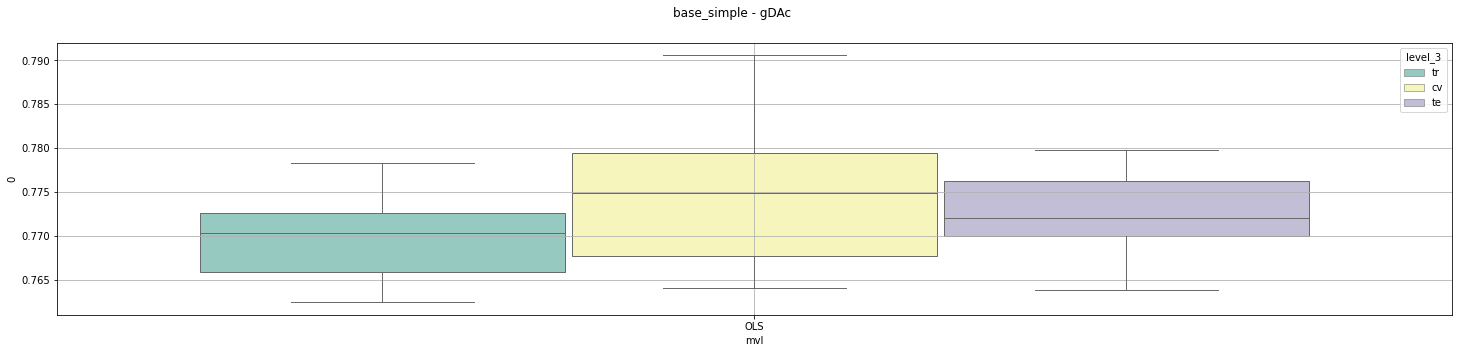

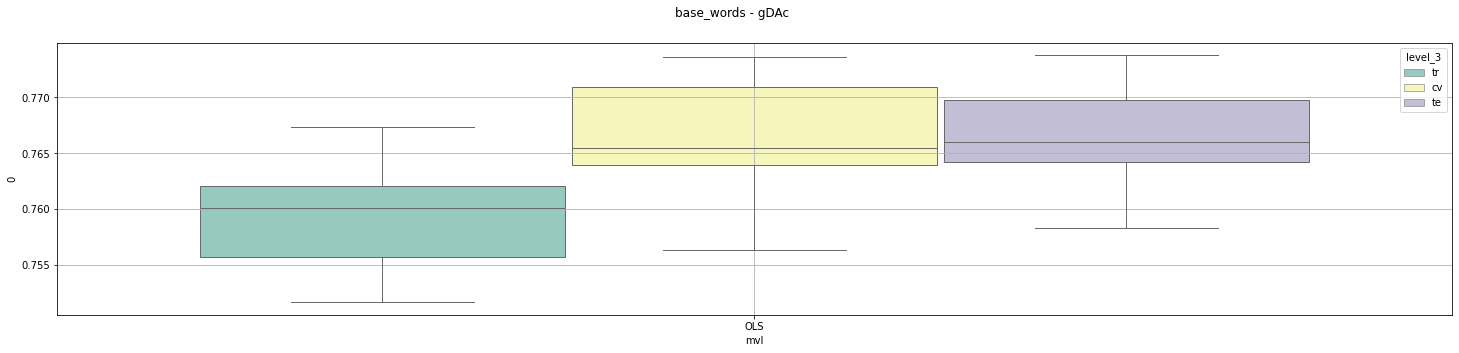

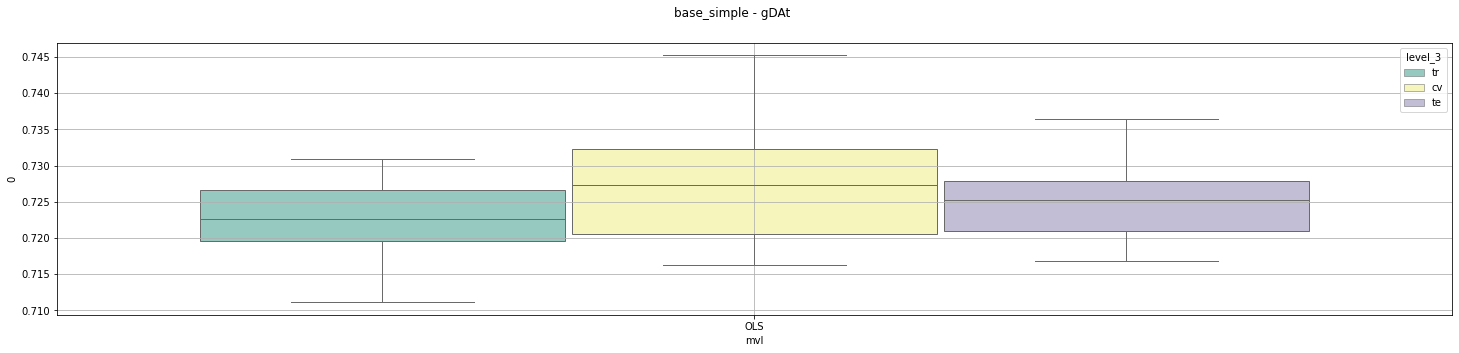

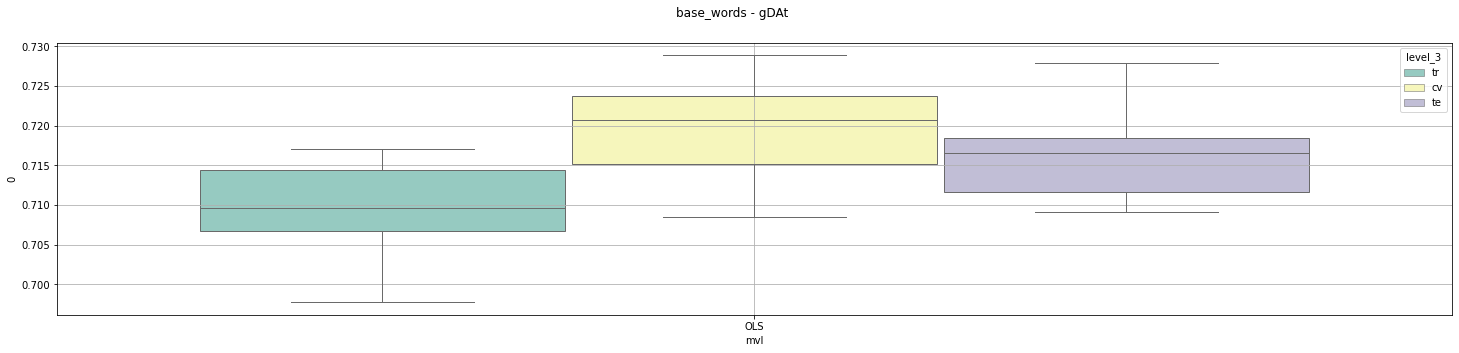

In [6]:
    # OUTPUT OPTION #1 - Separate plots for each name / channel

    for chl in concat.reset_index()['channel'].unique():
        chl_concat = concat.query(f"channel == '{chl}'")
        for nm in chl_concat.reset_index()['name'].unique():
            chl_nm_concat = chl_concat.query(f"name == '{nm}'")

            fig, ax = plt.subplots(1,1,figsize=(25,5))

            fig.suptitle(f'{nm} - {chl}')
            fig.set_facecolor('w')

            vwyc = chl_nm_concat.loc[chl].values
            ymn, ymx = np.min(vwyc), np.max(vwyc)

            vbp = chl_nm_concat.loc[chl].rename({'mse_tr':'1_tr', 'mse_cv':'2_cv', 'mse_te':'3_te'}, axis=1).stack().reset_index()
            vbp['mvl'] = vbp['label']
        #     vbp['mvl'] = vbp['label'] + ' / ' + vbp['level_3']
        #     vbp['mvl'] = vbp['level_3'] + ' / ' + vbp['label']
            vbp['mvl'] = vbp['mvl'].str.replace('simple_', '')
            vbp = vbp.sort_values(['mvl', 'level_3'])

            vbp['mvl'] = vbp['mvl'].apply(lambda x: x.split('_')[-1])
            vbp['level_3'] = vbp['level_3'].apply(lambda x: x.split('_')[-1])

            sns.boxplot(data=vbp, x='mvl', y=0, hue='level_3', palette="Set3", linewidth=1, ax=ax)
            ax.grid(True)
            plt.xticks(rotation=0)

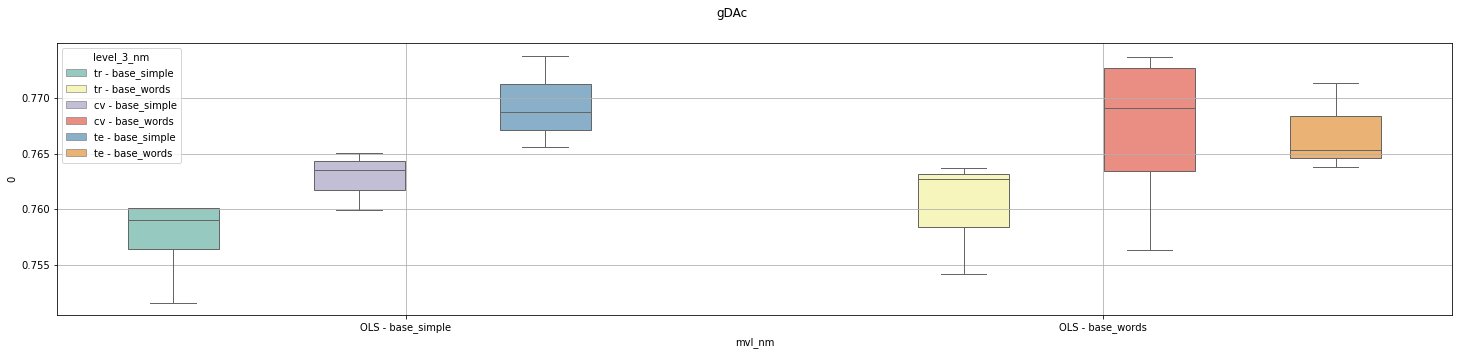

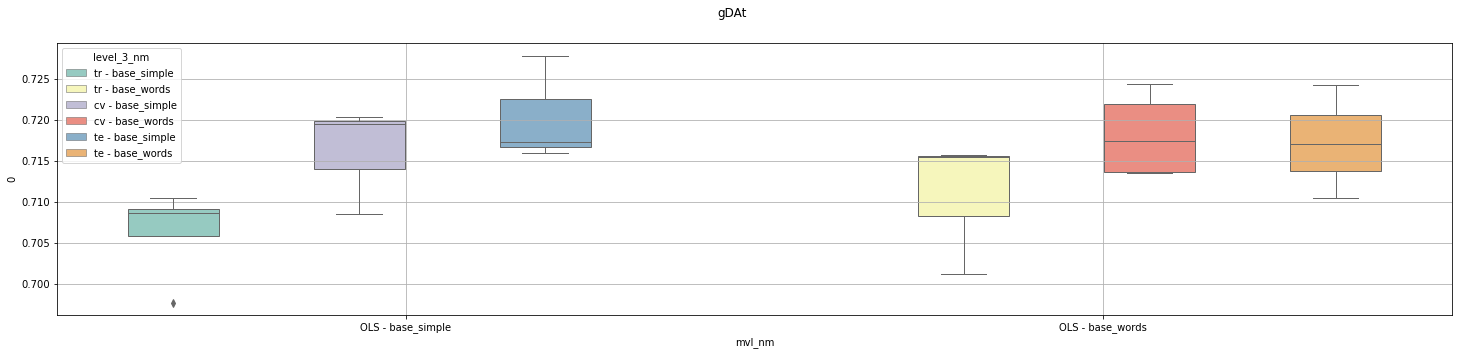

In [7]:
    # OUTPUT OPTION #2 - Separate plots by channel - combined names

    for chl in concat.reset_index()['channel'].unique():
        chl_concat = concat.query(f"channel == '{chl}'")
        fig, ax = plt.subplots(1,1,figsize=(25,5))
        
        fig.suptitle(f'{chl}')
        fig.set_facecolor('w')

#         for nm in chl_concat.reset_index()['name'].unique():
        chl_nm_concat = chl_concat.query(f"name == '{nm}'")


        vwyc = chl_nm_concat.loc[chl].values
        ymn, ymx = np.min(vwyc), np.max(vwyc)

        vbp = chl_nm_concat.loc[chl].rename({'mse_tr':'1_tr', 'mse_cv':'2_cv', 'mse_te':'3_te'}, axis=1).stack().reset_index()
        vbp['mvl'] = vbp['label']
    #     vbp['mvl'] = vbp['label'] + ' / ' + vbp['level_3']
    #     vbp['mvl'] = vbp['level_3'] + ' / ' + vbp['label']
        vbp['mvl'] = vbp['mvl'].str.replace('simple_', '')
        vbp = vbp.sort_values(['mvl', 'level_3'])

        vbp['mvl'] = vbp['mvl'].apply(lambda x: x.split('_')[-1])
        vbp['mvl_nm'] = vbp['mvl'] + ' - ' + chl_concat.reset_index()['name']
        vbp['level_3'] = vbp['level_3'].apply(lambda x: x.split('_')[-1])
        vbp['level_3_nm'] = vbp['level_3'] + ' - ' + chl_concat.reset_index()['name']


        sns.boxplot(data=vbp, x='mvl_nm', y=0, hue='level_3_nm', palette="Set3", linewidth=1, ax=ax)
        ax.grid(True)
        plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'OLS - base_simple - gDAc'),
  Text(1, 0, 'OLS - base_words - gDAc'),
  Text(2, 0, 'OLS - base_simple - gDAt'),
  Text(3, 0, 'OLS - base_words - gDAt')])

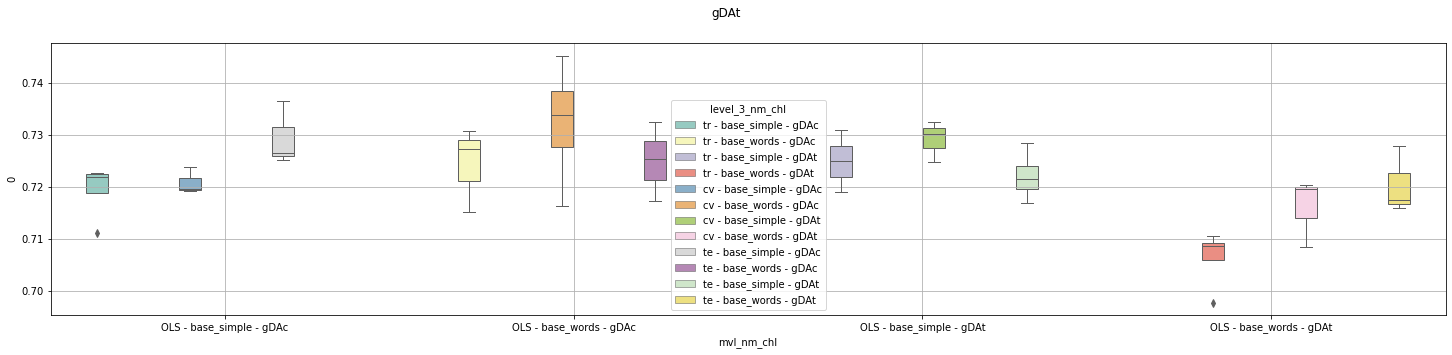

In [8]:
    # OUTPUT OPTION #3 - Combined plot for names + channels
    
    fig, ax = plt.subplots(1,1,figsize=(25,5))

    fig.suptitle(f'{chl}')
    fig.set_facecolor('w')

    vwyc = concat.loc[chl].values
    ymn, ymx = np.min(vwyc), np.max(vwyc)

    vbp = concat.loc[chl].rename({'mse_tr':'1_tr', 'mse_cv':'2_cv', 'mse_te':'3_te'}, axis=1).stack().reset_index()
    vbp['mvl'] = vbp['label']
    vbp['mvl'] = vbp['mvl'].str.replace('simple_', '')
    vbp = vbp.sort_values(['mvl', 'level_3'])

    vbp['mvl'] = vbp['mvl'].apply(lambda x: x.split('_')[-1])
    vbp['mvl_nm_chl'] = vbp['mvl'] + ' - ' + concat.reset_index()['name'] + ' - ' + concat.reset_index()['channel']
    vbp['level_3'] = vbp['level_3'].apply(lambda x: x.split('_')[-1])
    vbp['level_3_nm_chl'] = vbp['level_3'] + ' - ' + concat.reset_index()['name'] + ' - ' + concat.reset_index()['channel']


    sns.boxplot(data=vbp, x='mvl_nm_chl', y=0, hue='level_3_nm_chl', palette="Set3", linewidth=1, ax=ax)
    ax.grid(True)
    plt.xticks(rotation=0)

In [9]:
concat

mse_tr    mse_cv    mse_te
channel name        label run_num                              
gDAc    base_simple 1_OLS num=0    0.762400  0.764649  0.779832
                          num=1    0.769641  0.775156  0.772824
                          num=2    0.767689  0.764093  0.774953
                          num=3    0.771036  0.774485  0.771165
                          num=4    0.775164  0.780887  0.767650
                          num=5    0.764993  0.767630  0.777128
                          num=6    0.772947  0.780323  0.769629
                          num=7    0.771367  0.776934  0.770904
                          num=8    0.765325  0.767708  0.776665
                          num=9    0.778349  0.790569  0.763785
        base_words  1_OLS num=0    0.751669  0.759968  0.773766
                          num=1    0.760132  0.765039  0.765595
                          num=2    0.758080  0.763561  0.768675
                          num=3    0.760085  0.773612  0.765352
                          num=4    0.762702  0.765763  0.763823
                          num=5    0.754201  0.756339  0.771325
                          num=6    0.763681  0.772297  0.761767
                          num=7    0.760151  0.765191  0.766430
                          num=8    0.754965  0.766687  0.770115
                          num=9    0.767353  0.773043  0.758296
gDAt    base_simple 1_OLS num=0    0.711101  0.719480  0.736471
                          num=1    0.721341  0.723846  0.726503
                          num=2    0.722733  0.719244  0.725147
                          num=3    0.722439  0.731510  0.725300
                          num=4    0.730770  0.745230  0.717208
                          num=5    0.715091  0.716301  0.732420
                          num=6    0.727231  0.736144  0.720489
                          num=7    0.724925  0.730051  0.722627
                          num=8    0.718947  0.724705  0.728372
                          num=9    0.730917  0.732527  0.716863
        base_words  1_OLS num=0    0.697715  0.708497  0.727897
                          num=1    0.708583  0.720377  0.717380
                          num=2    0.710523  0.719485  0.715961
                          num=3    0.708627  0.713705  0.717127
                          num=4    0.715761  0.721176  0.710549
                          num=5    0.701216  0.713566  0.724238
                          num=6    0.715492  0.724417  0.709418
                          num=7    0.711390  0.728874  0.715171
                          num=8    0.706037  0.721840  0.718858
                          num=9    0.717027  0.727465  0.709132

In [10]:
vbp

,name,label,run_num,level_3,0,mvl,mvl_nm_chl,level_3_nm_chl
0,base_simple,1_OLS,num=0,tr,0.711101,OLS,OLS - base_simple - gDAc,tr - base_simple - gDAc
3,base_simple,1_OLS,num=1,tr,0.721341,OLS,OLS - base_simple - gDAc,tr - base_simple - gDAc
6,base_simple,1_OLS,num=2,tr,0.722733,OLS,OLS - base_simple - gDAc,tr - base_simple - gDAc
9,base_simple,1_OLS,num=3,tr,0.722439,OLS,OLS - base_simple - gDAc,tr - base_simple - gDAc
12,base_simple,1_OLS,num=4,tr,0.730770,OLS,OLS - base_words - gDAc,tr - base_words - gDAc
15,base_simple,1_OLS,num=5,tr,0.715091,OLS,OLS - base_words - gDAc,tr - base_words - gDAc
18,base_simple,1_OLS,num=6,tr,0.727231,OLS,OLS - base_words - gDAc,tr - base_words - gDAc
21,base_simple,1_OLS,num=7,tr,0.724925,OLS,OLS - base_simple - gDAt,tr - base_simple - gDAt
24,base_simple,1_OLS,num=8,tr,0.718947,OLS,OLS - base_simple - gDAt,tr - base_simple - gDAt
27,base_simple,1_OLS,num=9,tr,0.730917,OLS,OLS - base_simple - gDAt,tr - base_simple - gDAt
